In [1]:
import os
import matplotlib.pyplot as plt
import os
import pandas as pd
from amftrack.util.sys import get_analysis_folders,get_time_plate_info_from_analysis,get_time_hypha_info_from_analysis,get_global_hypha_info_from_analysis 
import numpy as np
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from amftrack.pipeline.final_analysis.density_wave import get_wave_fit, S, dS, wave, dwave
import matplotlib.patches as mpatches
from random import choice
import matplotlib as mpl
from amftrack.pipeline.final_analysis.density_wave import plot_single_plate
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
from amftrack.util.plot import gridplot, make_stat
%matplotlib widget
%load_ext autoreload
%autoreload 2
plt.style.use('presentation.mplstyle')
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from amftrack.pipeline.final_analysis.hypha_speed_analysis import *
import scipy
import statsmodels.api as sm
import hashlib

c:\users\coren\documents\phd\code\amftrack\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
all_analysis_folders = get_analysis_folders()

plate_select = [792,1014,1042,127,130,1023,1045,1053,1048,52,84,938,1076,94,152,102,76,30,32,33,91,799,800] #C2
plates = ['1014_20220525', '1023_20220502', '102_20201226', '1042_20220523',
       '1045_20220504', '1048_20220506', '1053_20220413', '1076_20220511',
       '127_20220705', '130_20220707', '152_20201224', '30_20220509',
       '32_20220428', '33_20220502', '52_20220707', '76_20210108',
       '792_20210915', '799_20211001', '800_20210928', '84_20220621', '91_20220708', '938_20220325', '94_20201123']
analysis_folders = all_analysis_folders.loc[all_analysis_folders['unique_id'].isin(plates)]


In [3]:
folders,time_plate_info = get_time_plate_info_from_analysis(analysis_folders,True)
# folders,global_hypha_info = get_global_hypha_info_from_analysis(analysis_folders,False)
# folders, time_hypha_info = get_time_hypha_info_from_analysis(analysis_folders,False)

In [4]:
time_plate_info

,num_trunks,area,area_sep_comp,num_tips,num_nodes,area_study,num_tips_study,num_nodes_study,tot_length_study,out_study,...,time_since_begin,time_since_begin_h,timestep,folder,unique_id,datetime,PrincePos,root,strain,medium
0,3,2009.202762,73.953242,165,664,472.863316,137,533,1.974531e+05,0,...,0,0.000000,0,20220525_1932_Plate01,101420220525,2022-05-25 19:32:00,1,'Carrot','C2','001P100N100C'
1,3,1277.697156,79.723629,175,662,1063.564715,149,570,2.155061e+05,0,...,7200000,2.000000,1,20220525_2132_Plate01,101420220525,2022-05-25 21:32:00,1,'Carrot','C2','001P100N100C'
2,3,1843.339773,86.467910,194,743,475.365315,156,600,2.340747e+05,0,...,14400000,4.000000,2,20220525_2332_Plate01,101420220525,2022-05-25 23:32:00,1,'Carrot','C2','001P100N100C'
3,3,1739.417100,93.516148,195,795,478.317672,169,682,2.553675e+05,0,...,21600000,6.000000,3,20220526_0132_Plate01,101420220525,2022-05-26 01:32:00,1,'Carrot','C2','001P100N100C'
4,3,1767.811196,105.860285,209,841,594.965816,188,752,2.866837e+05,0,...,28800000,8.000000,4,20220526_0332_Plate01,101420220525,2022-05-26 03:32:00,1,'Carrot','C2','001P100N100C'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3305,3,2798.334558,2342.940688,2829,21921,2349.661953,2558,20282,4.687869e+06,1,...,1110600000,308.500000,161,20201206_0923_Plate39,9420201123,2020-12-06 09:23:00,39,'Carrot','A5','001P100N'
3306,3,2798.622744,2346.010990,2835,22025,2352.030001,2571,20348,4.726132e+06,1,...,1125000000,312.500000,162,20201206_1323_Plate39,9420201123,2020-12-06 13:23:00,39,'Carrot','A5','001P100N'
3307,3,2809.006141,2343.269483,2962,24259,2350.538822,2670,22587,4.937082e+06,1,...,1139400000,316.500000,163,20201206_1723_Plate39,9420201123,2020-12-06 17:23:00,39,'Carrot','A5','001P100N'
3308,3,2800.172932,2346.795679,2932,23866,2353.118079,2642,22040,4.899435e+06,1,...,1153860000,320.516667,164,20201206_2124_Plate39,9420201123,2020-12-06 21:24:00,39,'Carrot','A5','001P100N'


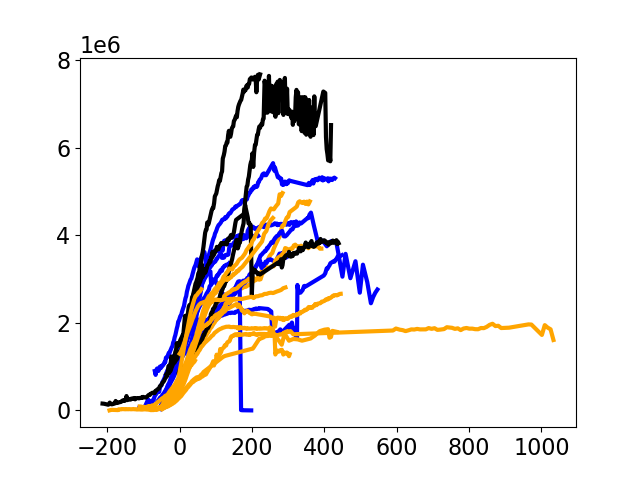

In [96]:
ncols = 3
min_time = {plate_id : 0 for plate_id in plates}
max_time = {plate_id : 100 for plate_id in plates}
min_time['799_20211001'] = 100
max_time['799_20211001'] = 200
hull_speeds_dic = {}
hull_time_dic = {}
datas = {}
dys = {}
fig,ax=plt.subplots()
colors_strain = {"'A5'" : 'orange',"'A5sp3'" : 'orange',"'C2'" : 'blue',"'Agg'":'black'}
length_increments = []
strains = []
for j in range(len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)].copy()
    time_plate_info_plate = time_plate_info_plate.sort_values(by = 'time_since_begin_h')
    strain = time_plate_info_plate['strain'].iloc[0]
    from_init = time_plate_info_plate.loc[time_plate_info_plate['area_sep_comp']>=500]
    t0 = np.min(from_init['time_since_begin_h'])
    time_plate_info_plate['time_since_begin_h_correct']=time_plate_info_plate['time_since_begin_h']-t0
    ax.plot(time_plate_info_plate['time_since_begin_h_correct'],time_plate_info_plate['tot_length_study'],color=colors_strain[strain])
    length_init = time_plate_info_plate.loc[time_plate_info_plate['time_since_begin_h_correct']>=0]['tot_length_study'].iloc[0]
    length_end = time_plate_info_plate.loc[time_plate_info_plate['time_since_begin_h_correct']>=20]['tot_length_study'].iloc[0]
    length_increment = length_end-length_init
    strains.append(strain)
    length_increments.append(length_increment/1000)
    # break
# plt.savefig(f'Figure/FigureS2C.svg')    

In [97]:
data = pd.DataFrame(np.transpose((strains,length_increments)),columns = ['strain','length_increment'])

data = data.replace("'A5sp3'","'A5'")

data['strain'].unique()

data['length_increment'] = data['length_increment'].astype(np.float64)

<ErrorbarContainer object of 3 artists>

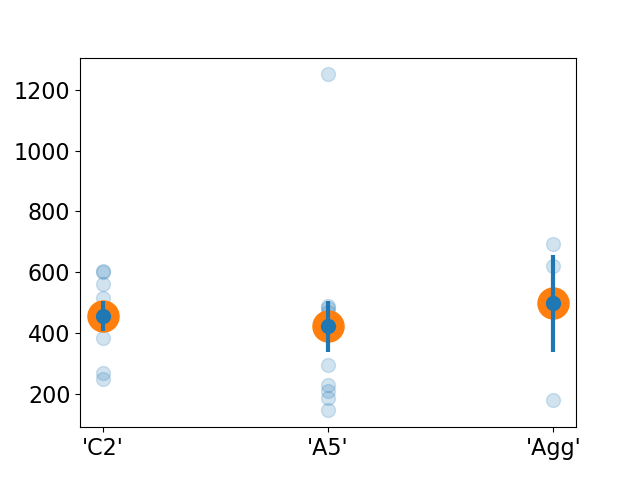

In [98]:
fig,ax=plt.subplots()

ax.scatter(data['strain'],data['length_increment'],alpha = 0.2)
mean = data.groupby("strain")['length_increment'].mean()
error = data.groupby("strain")['length_increment'].std()/np.sqrt(data.groupby("strain")['length_increment'].count())

# data.groupby("strain").std()
ax.scatter(mean.index,mean,s = 500)
ax.errorbar(mean.index,mean,error,fmt='o')

# ax.set_ylim(0,800)

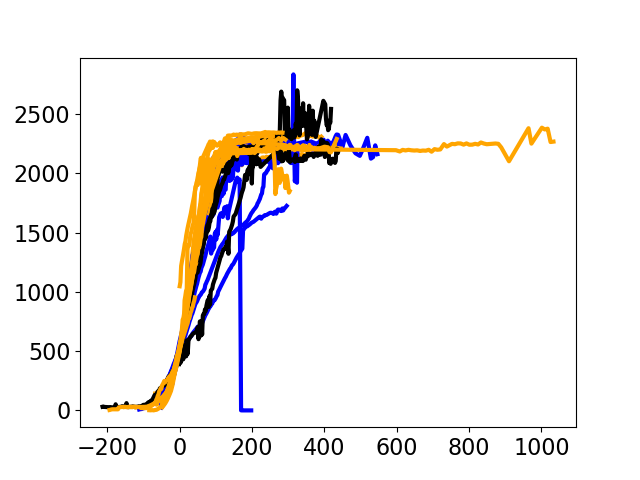

In [19]:
ncols = 3
min_time = {plate_id : 0 for plate_id in plates}
max_time = {plate_id : 100 for plate_id in plates}
min_time['799_20211001'] = 100
max_time['799_20211001'] = 200
hull_speeds_dic = {}
hull_time_dic = {}
datas = {}
dys = {}
fig,ax=plt.subplots()
colors_strain = {"'A5'" : 'orange',"'A5sp3'" : 'orange',"'C2'" : 'blue',"'Agg'":'black'}
for j in range(len(plates)):
    plate_id=plates[j]
    plate  = int(plate_id.split('_')[0])
    hull_speeds = []
    hull_time = []
    time_plate_info_plate = time_plate_info.loc[time_plate_info['unique_id']==int(plate_id)].copy()
    strain = time_plate_info_plate['strain'].iloc[0]
    from_init = time_plate_info_plate.loc[time_plate_info_plate['area_sep_comp']>=500]
    t0 = np.min(from_init['time_since_begin_h'])
    time_plate_info_plate['time_since_begin_h_correct']=time_plate_info_plate['time_since_begin_h']-t0
    ax.plot(time_plate_info_plate['time_since_begin_h_correct'],time_plate_info_plate['area_sep_comp'],color=colors_strain[strain])

    # break
# plt.savefig(f'Figure/FigureS2C.svg')    